# Problem

Audio classification 

## About

In this problem we have data audio data where 3 different type of audio sample.
These are noise, speech and music.  Here we have to make a model which will classify these three type of audio data to there respective category. So, 1st task will be making a model which will learn to classify these  samples,i.e.  training model. After completion of training our model when we give any other audio record then it will classify whether its a music or speech or noise.

In [1]:
# -*- coding: utf-8 -*-

#POC Code  :  Audio Classification  :  H2H DATA
 This code is for audio classification.
 Here we have 3 audio classes namely :
 	1. music
 	2. speech
 	3. noise 
This is done in 2 steps mainly.
	1. First we are seperating speech considering speech feature such as more zero crossing etc.
	2. Ater that music and noise will be seperated. 

Data wrangling and balancing will be done later.

*Here padding and data truncation is done to make data algorithm ready. 

#Copyright@ H2H DATA

The entire prcess occurs in seven stages-
1. DATA INGESTION
2. DATA ANALYSIS 
3. DATA MUNGING
4. DATA EXPLORATION
5. DATA MODELING
6. HYPER-PARAMETERS OPTIMIZATION
7. PREDICTION
8. VISUAL ANALYSIS
9. RESULTS


Used library
1. pandas
2. numpy
3. time
4. sklearn
5. tensorflow
"""

In [2]:
import helper
import model
import numpy as np 
import time


## Data Ingestion

In [3]:
music_files,m_folder = helper.get_files('music')
noise_files,n_folder = helper.get_files('noise')
speech_files,s_folder = helper.get_files('speech')

In [5]:
music_audio,SR1 = helper.get_audio(music_files,m_folder)
print 'reading music completed'
noise_audio,SR2 = helper.get_audio(noise_files,n_folder)
print 'reading noise completed'
speech_audio,SR3 = helper.get_audio(speech_files,s_folder)
print 'reading speech completed'

reading music completed
reading noise completed
reading speech completed


In [7]:
music_audio[0]

array([ 1.5441890e-06,  2.0374057e-07, -2.2988779e-06, ...,
        5.3439458e-04,  1.4135248e-03,  0.0000000e+00], dtype=float32)

## Data Analysis

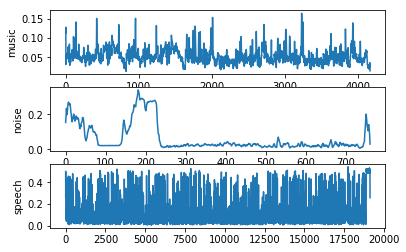

In [8]:
music = helper.zcr(music_audio[0])
noise = helper.zcr(noise_audio[0])
speech = helper.zcr(speech_audio[0])
helper.plot_all(music[0],noise[0],speech[0])

Here we can see that ZCR is too high of speech audio while in music its maximu aroud 0.15and in noise its below three and less value near 3. 

## Data exploration

In [ ]:
combined_all = sum([music_audio,noise_audio,speech_audio],[])
combined_nn = sum([music_audio,noise_audio],[])
combined_nn = helper.make_data_proper(combined_nn)

# label = np.array(sum([[0]*len(music_audio),[1]*len(noise_audio),[2]*len(speech_audio)],[]))
# label_nn = np.array(sum([[0]*len(music_audio),[1]*len(noise_audio)],[]))
label_speech  =  sum([[0]*len(music_audio),[0]*len(noise_audio),[1]*len(speech_audio)],[])
label = sum([[0]*len(music_audio),[1]*len(noise_audio),[2]*len(speech_audio)],[])
label_nn = sum([[0]*len(music_audio),[1]*len(noise_audio)],[])
combined_nn_ = []
r = len(combined_nn)
c = len(combined_nn[0])
i = 0
for array in combined_nn:
    combined_nn.append(array)

combined_nn = np.reshape(combined_nn_,(r,c))

## Modeling

In [3]:
#1st model call 
speech_index = model.seperate_speech(combined_all)
speech_count = len(speech_audio)
speech_predicted = [0]*len(speech_audio)
for index in speech_index:
    speech_predicted[index] = 1
print helper.acc(label_speech, speech_predicted) 

#2nd model using Neural Network
print model.seperate_music1(combined_nn,label_nn,combined_nn,label_nn)
print model.seperate_music2(combined_nn,label_nn,combined_nn,label_nn)

In [5]:
print 'modeling done'

modeling done
